In [55]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
dataset = pd.read_csv('laptop_price.csv')
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [57]:
from sklearn.impute import SimpleImputer
imputer_str = SimpleImputer(strategy='most_frequent')
dataset[['ScreenResolution','GPU_Company','GPU_Type']] = imputer_str.fit_transform(dataset[['ScreenResolution','GPU_Company','GPU_Type']])
from sklearn.impute import SimpleImputer
imputer_int = SimpleImputer(strategy='mean')
dataset[['CPU_Frequency (GHz)']] = imputer_int.fit_transform(dataset[['CPU_Frequency (GHz)']])

In [58]:
dataset.isna().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [59]:
category_feature =dataset.select_dtypes(include='object').columns
category_feature

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company',
       'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys'],
      dtype='object')

In [60]:
for i in category_feature:
    frequent_encoding = dataset[i].value_counts()
    dataset[f'{i}_frequent'] = dataset[i].map(frequent_encoding)

In [61]:
dataset.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Company_frequent,Product_frequent,TypeName_frequent,ScreenResolution_frequent,CPU_Company_frequent,CPU_Type_frequent,Memory_frequent,GPU_Company_frequent,GPU_Type_frequent,OpSys_frequent
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,21,10,194,6,1214,12,74,705,8,13
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,21,2,194,4,1214,12,4,705,5,13
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,268,21,707,505,1214,193,412,705,285,66
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,21,10,194,4,1214,4,114,174,1,13
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,21,10,194,6,1214,12,412,705,2,13


In [62]:
pd.set_option('display.max_columns',None)

In [63]:
dataset.drop(columns=category_feature,inplace = True)

In [64]:
dataset.head()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro),Company_frequent,Product_frequent,TypeName_frequent,ScreenResolution_frequent,CPU_Company_frequent,CPU_Type_frequent,Memory_frequent,GPU_Company_frequent,GPU_Type_frequent,OpSys_frequent
0,13.3,2.3,8,1.37,1339.69,21,10,194,6,1214,12,74,705,8,13
1,13.3,1.8,8,1.34,898.94,21,2,194,4,1214,12,4,705,5,13
2,15.6,2.5,8,1.86,575.00,268,21,707,505,1214,193,412,705,285,66
3,15.4,2.7,16,1.83,2537.45,21,10,194,4,1214,4,114,174,1,13
4,13.3,3.1,8,1.37,1803.60,21,10,194,6,1214,12,412,705,2,13


In [65]:
feature_scatter = dataset.drop('Price (Euro)',axis=1)

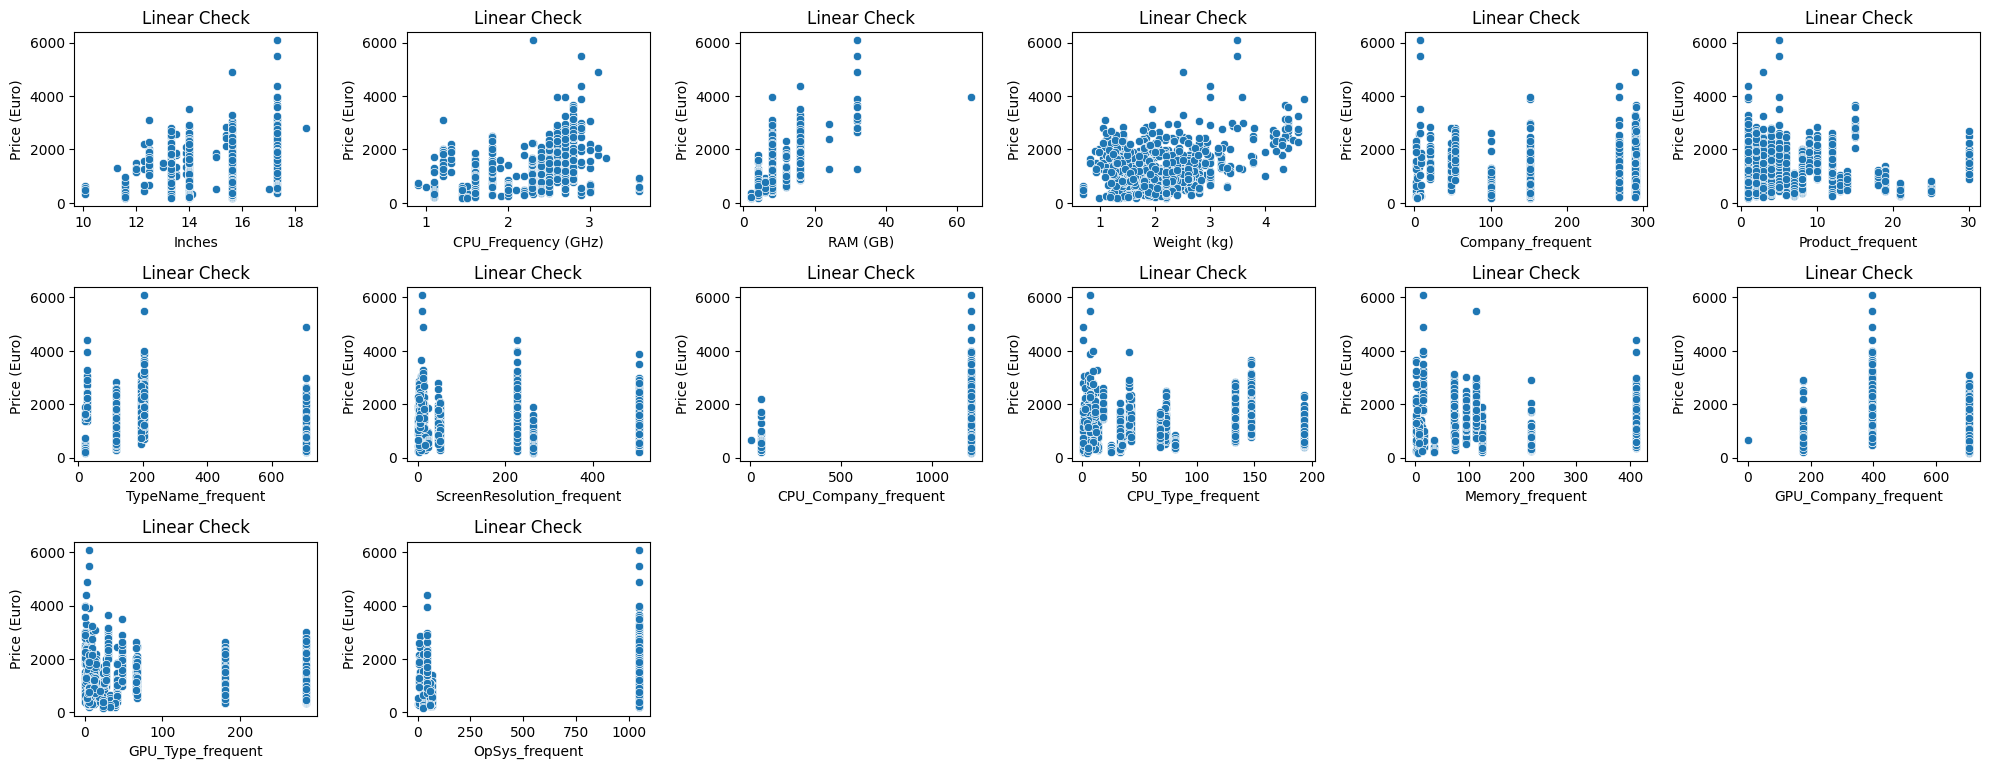

In [66]:
plt.figure(figsize=(20,15))
for i,j in enumerate(feature_scatter):
    plt.subplot(6,6, i+1)
    sns.scatterplot(x = dataset[j],y = dataset['Price (Euro)'])
    plt.xlabel(j)
    plt.ylabel('Price (Euro)')
    plt.title('Linear Check')
plt.tight_layout()

In [76]:
feature_heat.columns

Index(['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)',
       'Company_frequent', 'Product_frequent', 'TypeName_frequent',
       'ScreenResolution_frequent', 'CPU_Company_frequent',
       'CPU_Type_frequent', 'Memory_frequent', 'GPU_Company_frequent',
       'GPU_Type_frequent', 'OpSys_frequent'],
      dtype='object')

In [97]:
feature_heat = dataset.drop('Price (Euro)',axis=1)

correlation_matrix = dataset.corr()

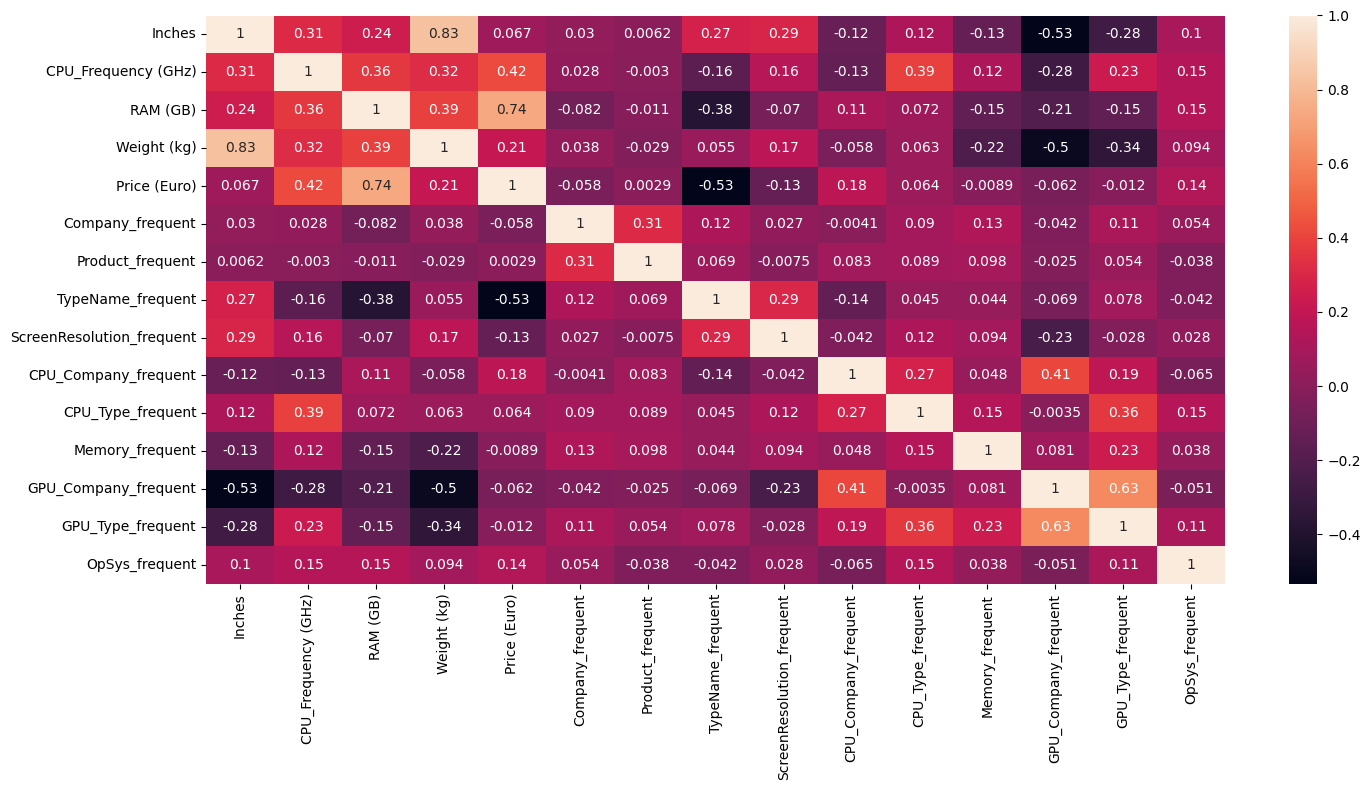

In [98]:
plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix,annot=True)
plt.tight_layout()

In [99]:
threshold = 0.6
correlation_feature = set()

In [100]:
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > threshold:
            correlation_feature.add(correlation_matrix.columns[j])

In [101]:
correlation_feature

{'GPU_Company_frequent', 'Inches', 'RAM (GB)'}

In [89]:
drop_feature = set()

In [93]:
for i in correlation_feature:
    if i in dataset:
        drop_feature.add(i)

In [94]:
drop_feature

{13,
 'GPU_Company_frequent',
 'GPU_Type_frequent',
 'Inches',
 'Price (Euro)',
 'RAM (GB)',
 'Weight (kg)'}

In [92]:
dataset.head()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro),Company_frequent,Product_frequent,TypeName_frequent,ScreenResolution_frequent,CPU_Company_frequent,CPU_Type_frequent,Memory_frequent,GPU_Company_frequent,GPU_Type_frequent,OpSys_frequent
0,13.3,2.3,8,1.37,1339.69,21,10,194,6,1214,12,74,705,8,13
1,13.3,1.8,8,1.34,898.94,21,2,194,4,1214,12,4,705,5,13
2,15.6,2.5,8,1.86,575.00,268,21,707,505,1214,193,412,705,285,66
3,15.4,2.7,16,1.83,2537.45,21,10,194,4,1214,4,114,174,1,13
4,13.3,3.1,8,1.37,1803.60,21,10,194,6,1214,12,412,705,2,13


In [104]:
dataset.drop('Inches',axis=1,inplace=True)

In [106]:
x = dataset.drop('Price (Euro)',axis=1)
y = dataset['Price (Euro)']

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=33)

In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [112]:
model_poly = make_pipeline(PolynomialFeatures(),LinearRegression())

In [113]:
model_poly.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [114]:
model_poly.score(x_train,y_train)

0.7992389551698234

In [115]:
model_poly.score(x_test,y_test)

0.7476487560192016

In [116]:
y_predict_poly = model_poly.predict(x_test)

In [131]:
from sklearn.metrics import r2_score
value_poly = r2_score(y_predict_poly,y_test)

In [118]:
lr = LinearRegression()

In [119]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.6920154288397837

In [120]:
lr.score(x_test,y_test)

0.6126163773448898

In [122]:
y_predict = lr.predict(x_test)

In [132]:
value = r2_score(y_predict,y_test)

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
model_ply_sc = make_pipeline(PolynomialFeatures(),StandardScaler(),LinearRegression())

In [126]:
model_ply_sc.fit(x_train,y_train)
model_ply_sc.score(x_test,y_test)

0.745756778285887

In [127]:
model_ply_sc.score(x_train,y_train)

0.7991115046104298

In [128]:
y_predict_p_sc = model_ply_sc.predict(x_test)

In [133]:
value_poly_sc = r2_score(y_predict_p_sc,y_test)

In [134]:
value

0.5397010730588105

In [135]:
value_poly

0.6752111510589156

In [136]:
value_poly_sc

0.6742492378496643

In [137]:
y_train_pred_p_sc = model_ply_sc.predict(x_train)
r2_train = r2_score(y_train, y_train_pred_p_sc)
r2_test = r2_score(y_test, y_predict_p_sc)
print(f"Train R²: {r2_train}, Test R²: {r2_test}")

Train R²: 0.7991115046104298, Test R²: 0.745756778285887


In [142]:
from sklearn.linear_model import Ridge, Lasso
model_ridge = make_pipeline(PolynomialFeatures(), StandardScaler(), Ridge(alpha=1))
model_ridge.fit(x_train, y_train)
y_predict_ridge = model_ridge.predict(x_test)
value_ridge = r2_score(y_test, y_predict_ridge)
print(f'Ridge Model R²: {value_ridge}')


Ridge Model R²: 0.7485028929228887


Why You Use Lasso and Ridge:
Lasso (L1): Helps with feature selection by driving some coefficients to zero, which can make the model simpler and eliminate irrelevant variables.
Ridge (L2): Helps when features are correlated or the dataset has multicollinearity, by shrinking coefficients and stabilizing the model.

When to Use Each:
Use Lasso: When you suspect that only a subset of the features are useful and want to reduce the number of variables.
Use Ridge: When all features are likely to contribute to the prediction and you want to reduce multicollinearity and prevent overfitting.

In [ ]:
pd.set_option('display.max_columns',None)